In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib
data_dir = pathlib.Path(os.getcwd() + "/model")

In [4]:
batch_size = 6
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 99 files belonging to 3 classes.
Using 80 files for training.
Metal device set to: Apple M1


2022-02-09 14:07:19.069585: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-09 14:07:19.069738: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 99 files belonging to 3 classes.
Using 19 files for validation.


In [7]:
class_names = ['O','X', 'empty']

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 1/14 [=>............................] - ETA: 4s - loss: 1.0816 - accuracy: 0.5000

2022-02-09 14:07:24.116533: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-09 14:07:24.116601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 1s 37ms/step - loss: 1.7737 - accuracy: 0.4125 - val_loss: 1.0729 - val_accuracy: 0.1579
Epoch 2/10
 4/14 [=======>......................] - ETA: 0s - loss: 0.8016 - accuracy: 0.7500

2022-02-09 14:07:24.693734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 25ms/step - loss: 0.6520 - accuracy: 0.7375 - val_loss: 0.3089 - val_accuracy: 0.8947
Epoch 3/10
14/14 [==============================] - 0s 22ms/step - loss: 0.1795 - accuracy: 0.9750 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 0s 22ms/step - loss: 0.0517 - accuracy: 0.9750 - val_loss: 0.0579 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 0s 22ms/step - loss: 0.0257 - accuracy: 0.9875 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 0s 22ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 0s 22ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==============================] - 0s 24ms/step - loss: 3.6206e-04 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 9/10
14/14 [==

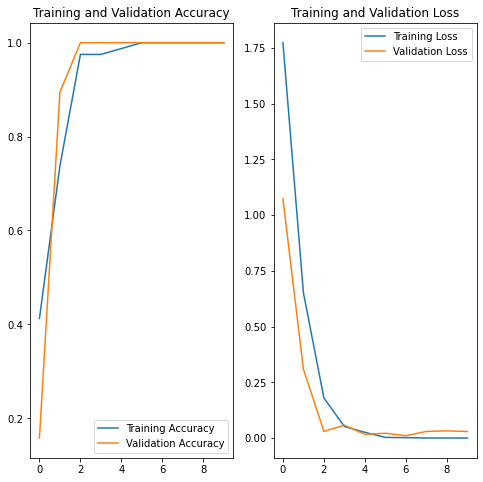

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [30]:
selected_pair = 'test/117.jpg'
#pair_path = tf.keras.utils.get_file('1', origin=selected_pair)



img = tf.keras.utils.load_img(
selected_pair, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch



predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])



print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score))
)

2022-02-10 11:46:25.049620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


This image most likely belongs to X with a 100.00 percent confidence.


In [ ]:
 model.save_weights('model/weights.h5')